# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


## Group Number : 42

## Student 1 
### Name : Otte van Dam
### ID : 5096790

## Student 2
### Name : Suhaib Basir
### ID : 5059151

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [31]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from datetime import datetime


## 1. Familiarization task – 1 A4

In [2]:
data = "train_data.csv"
df1 = pd.read_csv(data)
original_data = df1
df1 = df1.drop(['Id'], axis=1)

          data types  unique values
Timestamp     object         496800
FIT101       float64           2778
LIT101       float64          10322
MV101          int64              3
P101           int64              2
P102           int64              1
AIT201       float64            549
AIT202       float64           1695
AIT203       float64           5696
FIT201       float64           2879
MV201          int64              3
P201           int64              1
P202           int64              1
P203           int64              2
P204           int64              1
P205           int64              2
P206           int64              1
DPIT301      float64           4854
FIT301       float64           6224
LIT301       float64           9880
MV301          int64              3
MV302          int64              3
MV303          int64              3
MV304          int64              3
P301           int64              2
P302           int64              2
AIT401       float64        

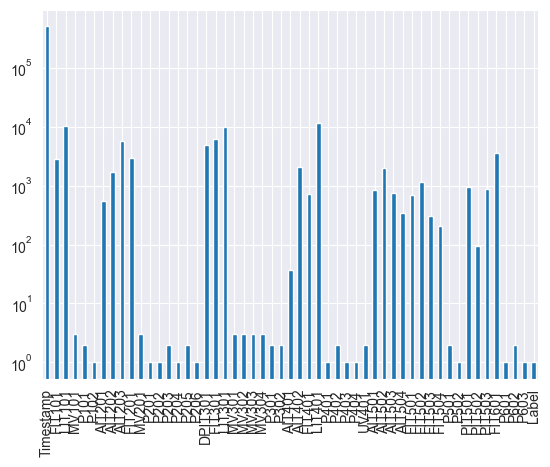

In [3]:
unique_values = df1.nunique()
unique_values.name = 'unique values'

data_types = df1.dtypes
data_types.name = 'data types'

print(pd.merge(data_types, unique_values, left_index=True, right_index=True))

ax = unique_values.plot.bar()
ax.set_yscale('log')

plt.show()

### 1a. Plot visualizations 

C:\Users\ottev\AppData\Local\Temp\ipykernel_6056\2033849614.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1_heat_map.corr())


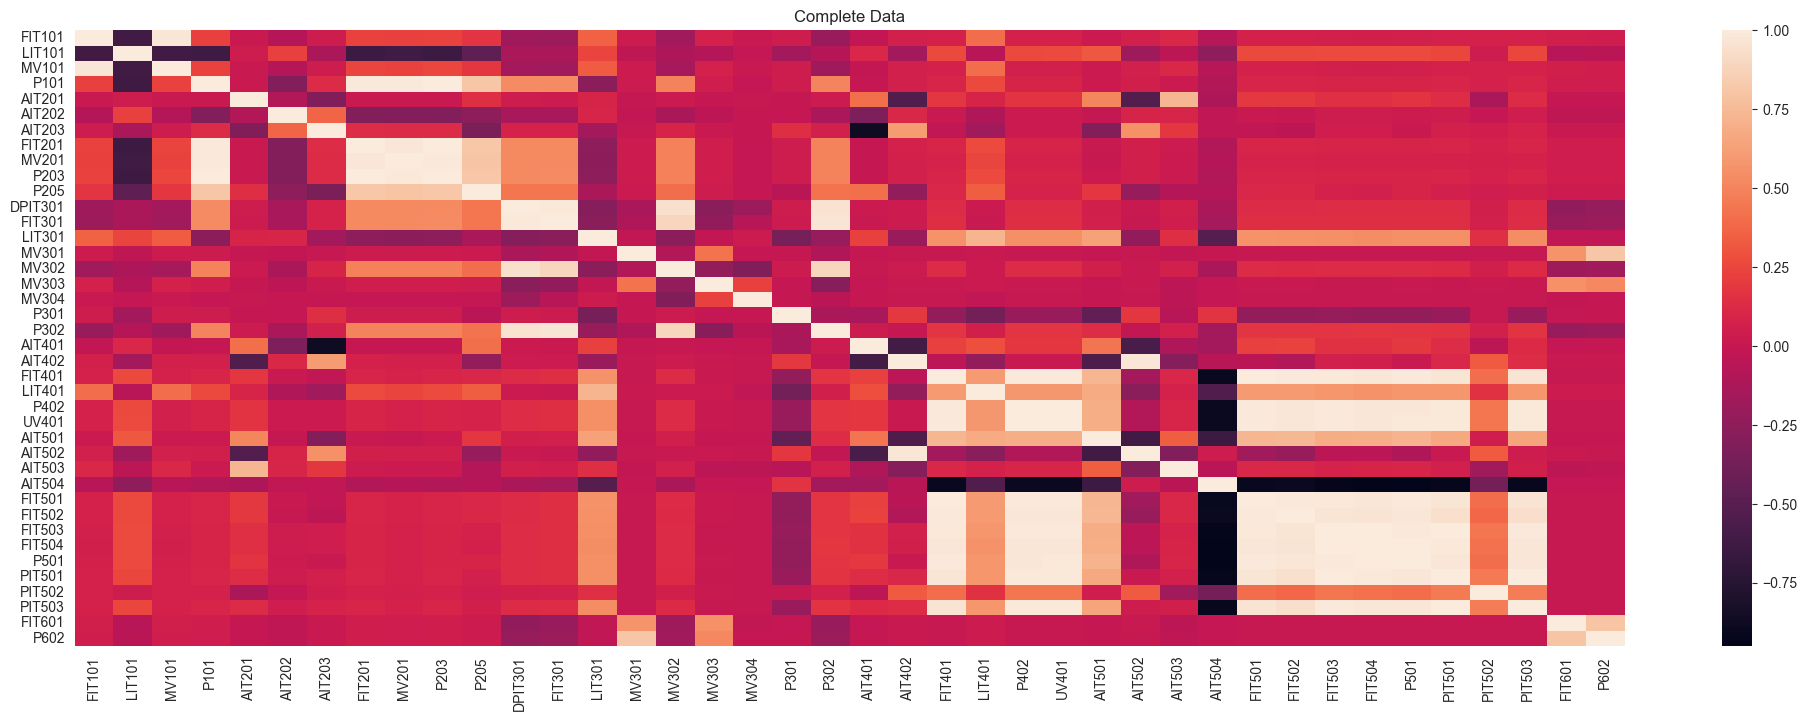

In [4]:
f, (ax1) = plt.subplots(1,figsize =(25, 8))
single_value = []
# Store all the columns with only one unique value since they have no correlation
for i in range(len(df1.nunique())):
    if unique_values[i] == 1:
        single_value.append(i)

df1_heat_map = df1.drop(df1.columns[single_value], axis=1)
sns.heatmap(df1_heat_map.corr())
ax1.set_title('Complete Data')
plt.show()

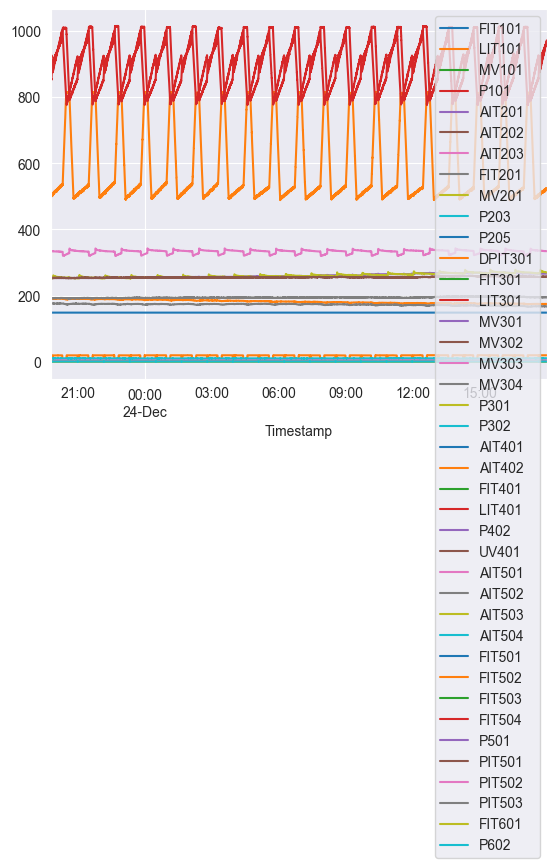

In [5]:
# Assuming your dataframe is called df and has a column named 'timestamp'
# You can use the pd.to_datetime function to convert the timestamp column to datetime objects
df1_first_part = df1[100000:180000].drop(df1.columns[single_value], axis=1)
df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])

# You can use the df.set_index method to set the timestamp column as the index of the dataframe
df1_timestamp_indexed = df1_first_part.set_index('Timestamp')
# You can use the df.plot method to plot the dataframe with all the columns on the y-axis
df1_timestamp_indexed.plot()
plt.show()

### 1b. Answers to the three questions

## 2. LOF task – 1/2 A4 – Individual

### 2a. Plot LOF scores

In [45]:
clf = LocalOutlierFactor(n_neighbors=50)
df1_lof = df1.drop(['Timestamp', 'Label'],axis=1)
y_pred = clf.fit_predict(df1_lof)
indexes_outliers = []
for i in range(len(y_pred)):
    if y_pred[i] == -1:
        indexes_outliers.append(i)
outliers = df1.iloc[indexes_outliers]

### 2b. Analysis and answers to the questions

made timestamps
994
made scatterplot


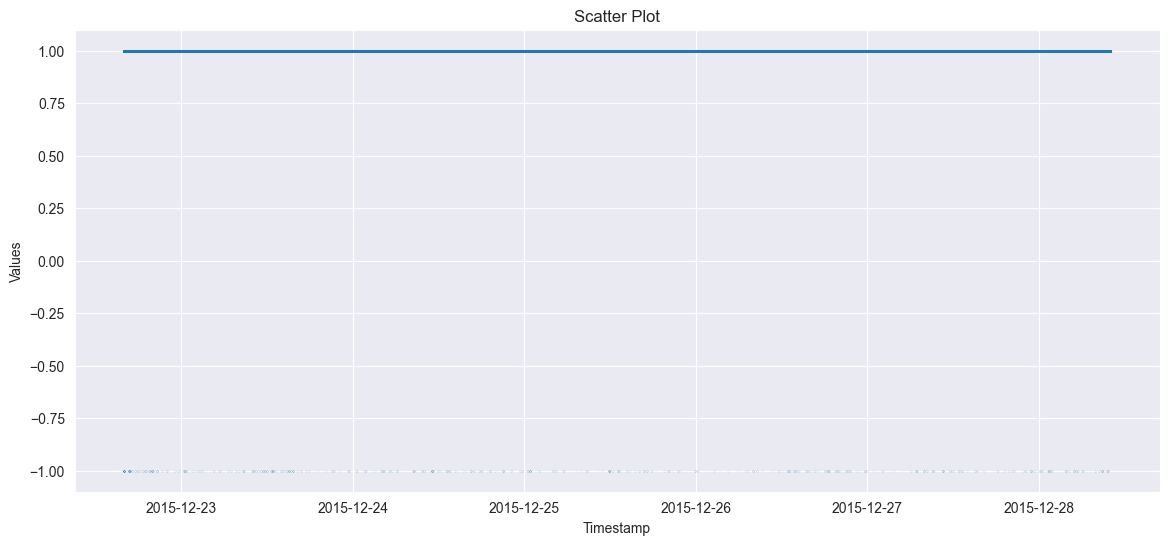

In [46]:
# Convert timestamps to datetime objects
timestamps = [datetime.strptime(ts.strip(), '%d/%m/%Y %I:%M:%S %p') for ts in df1['Timestamp']]
print('made timestamps')
# Create scatter plot
print(len(outliers))
fig, ax = plt.subplots(figsize=(14, 6))

ax.scatter(timestamps, y_pred, s=0.001)
print('made scatterplot')
# Set labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Values')
ax.set_title('Scatter Plot')

plt.show()

## 3. PCA task – 1/2 A4 – Individual

### 3a. Plot PCA residuals

### 3b. Analysis and answers to the questions

## 4. ARMA task – 1/2 A4 - Individual

### 4a. Print relevant plots and/or metrics to determine the parameters.

### 4b. Plots to study the detected anomalies

### 4c. Analysis and answers to the questions

## 5. N-gram task – 1/2 A4 - Individual

### 5a. Visualise discretization

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Comparision task 1 A4 - Individual

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.